In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
%matplotlib inline

In [3]:
Cell_dat = pd.read_csv("C:/Users/melod/Desktop/RongRong/Dry/Classifier/Chenhsuan/flow_data/CSV_File/cell.dat.cytonorm_0_1.csv", index_col = 0)

In [4]:
Cell_dat.head()

,CD4_aligned,CXCR5_aligned,CCR5_aligned,CD2_aligned,CD39_aligned,CCR6_aligned,CCR7_aligned,IgM_aligned,CD3_aligned,IgG_aligned,...,CD11c_aligned,CD127_aligned,CD1c_aligned,CD19_aligned,CD123_aligned,CD45_aligned,CD27_aligned,CD45RA_aligned,CD20_aligned,Group
1,0.400251,0.431474,0.556023,2.622758,0.986178,0.919630,1.373694,0.779860,0.590463,0.357423,...,0.581930,1.544557,0.497632,0.962297,0.494675,1.231347,0.180383,0.552973,0.669908,0
2,1.335115,0.325003,0.679864,2.109122,0.879144,1.545257,0.333328,0.786004,1.960250,0.593637,...,0.216976,0.458816,0.793981,0.430411,0.621023,1.655016,1.833521,0.454485,0.482853,0
3,1.593137,0.686687,0.468124,2.150454,1.045026,0.512828,2.293453,0.794484,2.105395,0.653152,...,0.454171,1.622050,0.474801,0.918768,0.399253,1.540352,1.989292,1.078641,0.537407,0
4,0.504071,0.363395,0.589950,2.424035,1.044820,0.686404,2.196246,1.474703,1.813845,0.594619,...,0.467541,1.691940,0.852023,0.650743,0.385750,1.582858,2.190644,1.830599,0.326083,0
5,0.276584,2.276610,0.335276,0.572432,1.354532,2.308259,1.660124,1.990799,0.847937,0.698491,...,0.274250,0.682154,1.413441,0.866680,0.148810,1.441091,0.431587,1.706746,1.792337,0


Random Forest

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix

In [5]:
#X as the features we're going to use, Y is the target. (The groups we would like to classify with)
X = Cell_dat.loc[:,Cell_dat.columns[:-1]]
y = Cell_dat['Group']

In [6]:
#Take 30% of dataset as our testing set and the other 70% are the training set. Set the random_state for the reproducibility.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
#Set rfc as our random forest model. Set the decision trees to 200.
rfc = RandomForestClassifier(n_estimators = 200 , random_state = 0)

In [19]:
#Fit the model and fit it to our testing set.
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [20]:
#Print out the accuracy.
print(confusion_matrix(y_test , y_pred))
print('\n')
print(classification_report(y_test , y_pred))

[[33114  3371]
 [ 2941 32055]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.91     36485
           1       0.90      0.92      0.91     34996

    accuracy                           0.91     71481
   macro avg       0.91      0.91      0.91     71481
weighted avg       0.91      0.91      0.91     71481



In [21]:
#Get the importance features, and sort the values.
rfc_feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [24]:
rfc_feature_scores_all = rfc_feature_scores.loc[rfc_feature_scores.index]

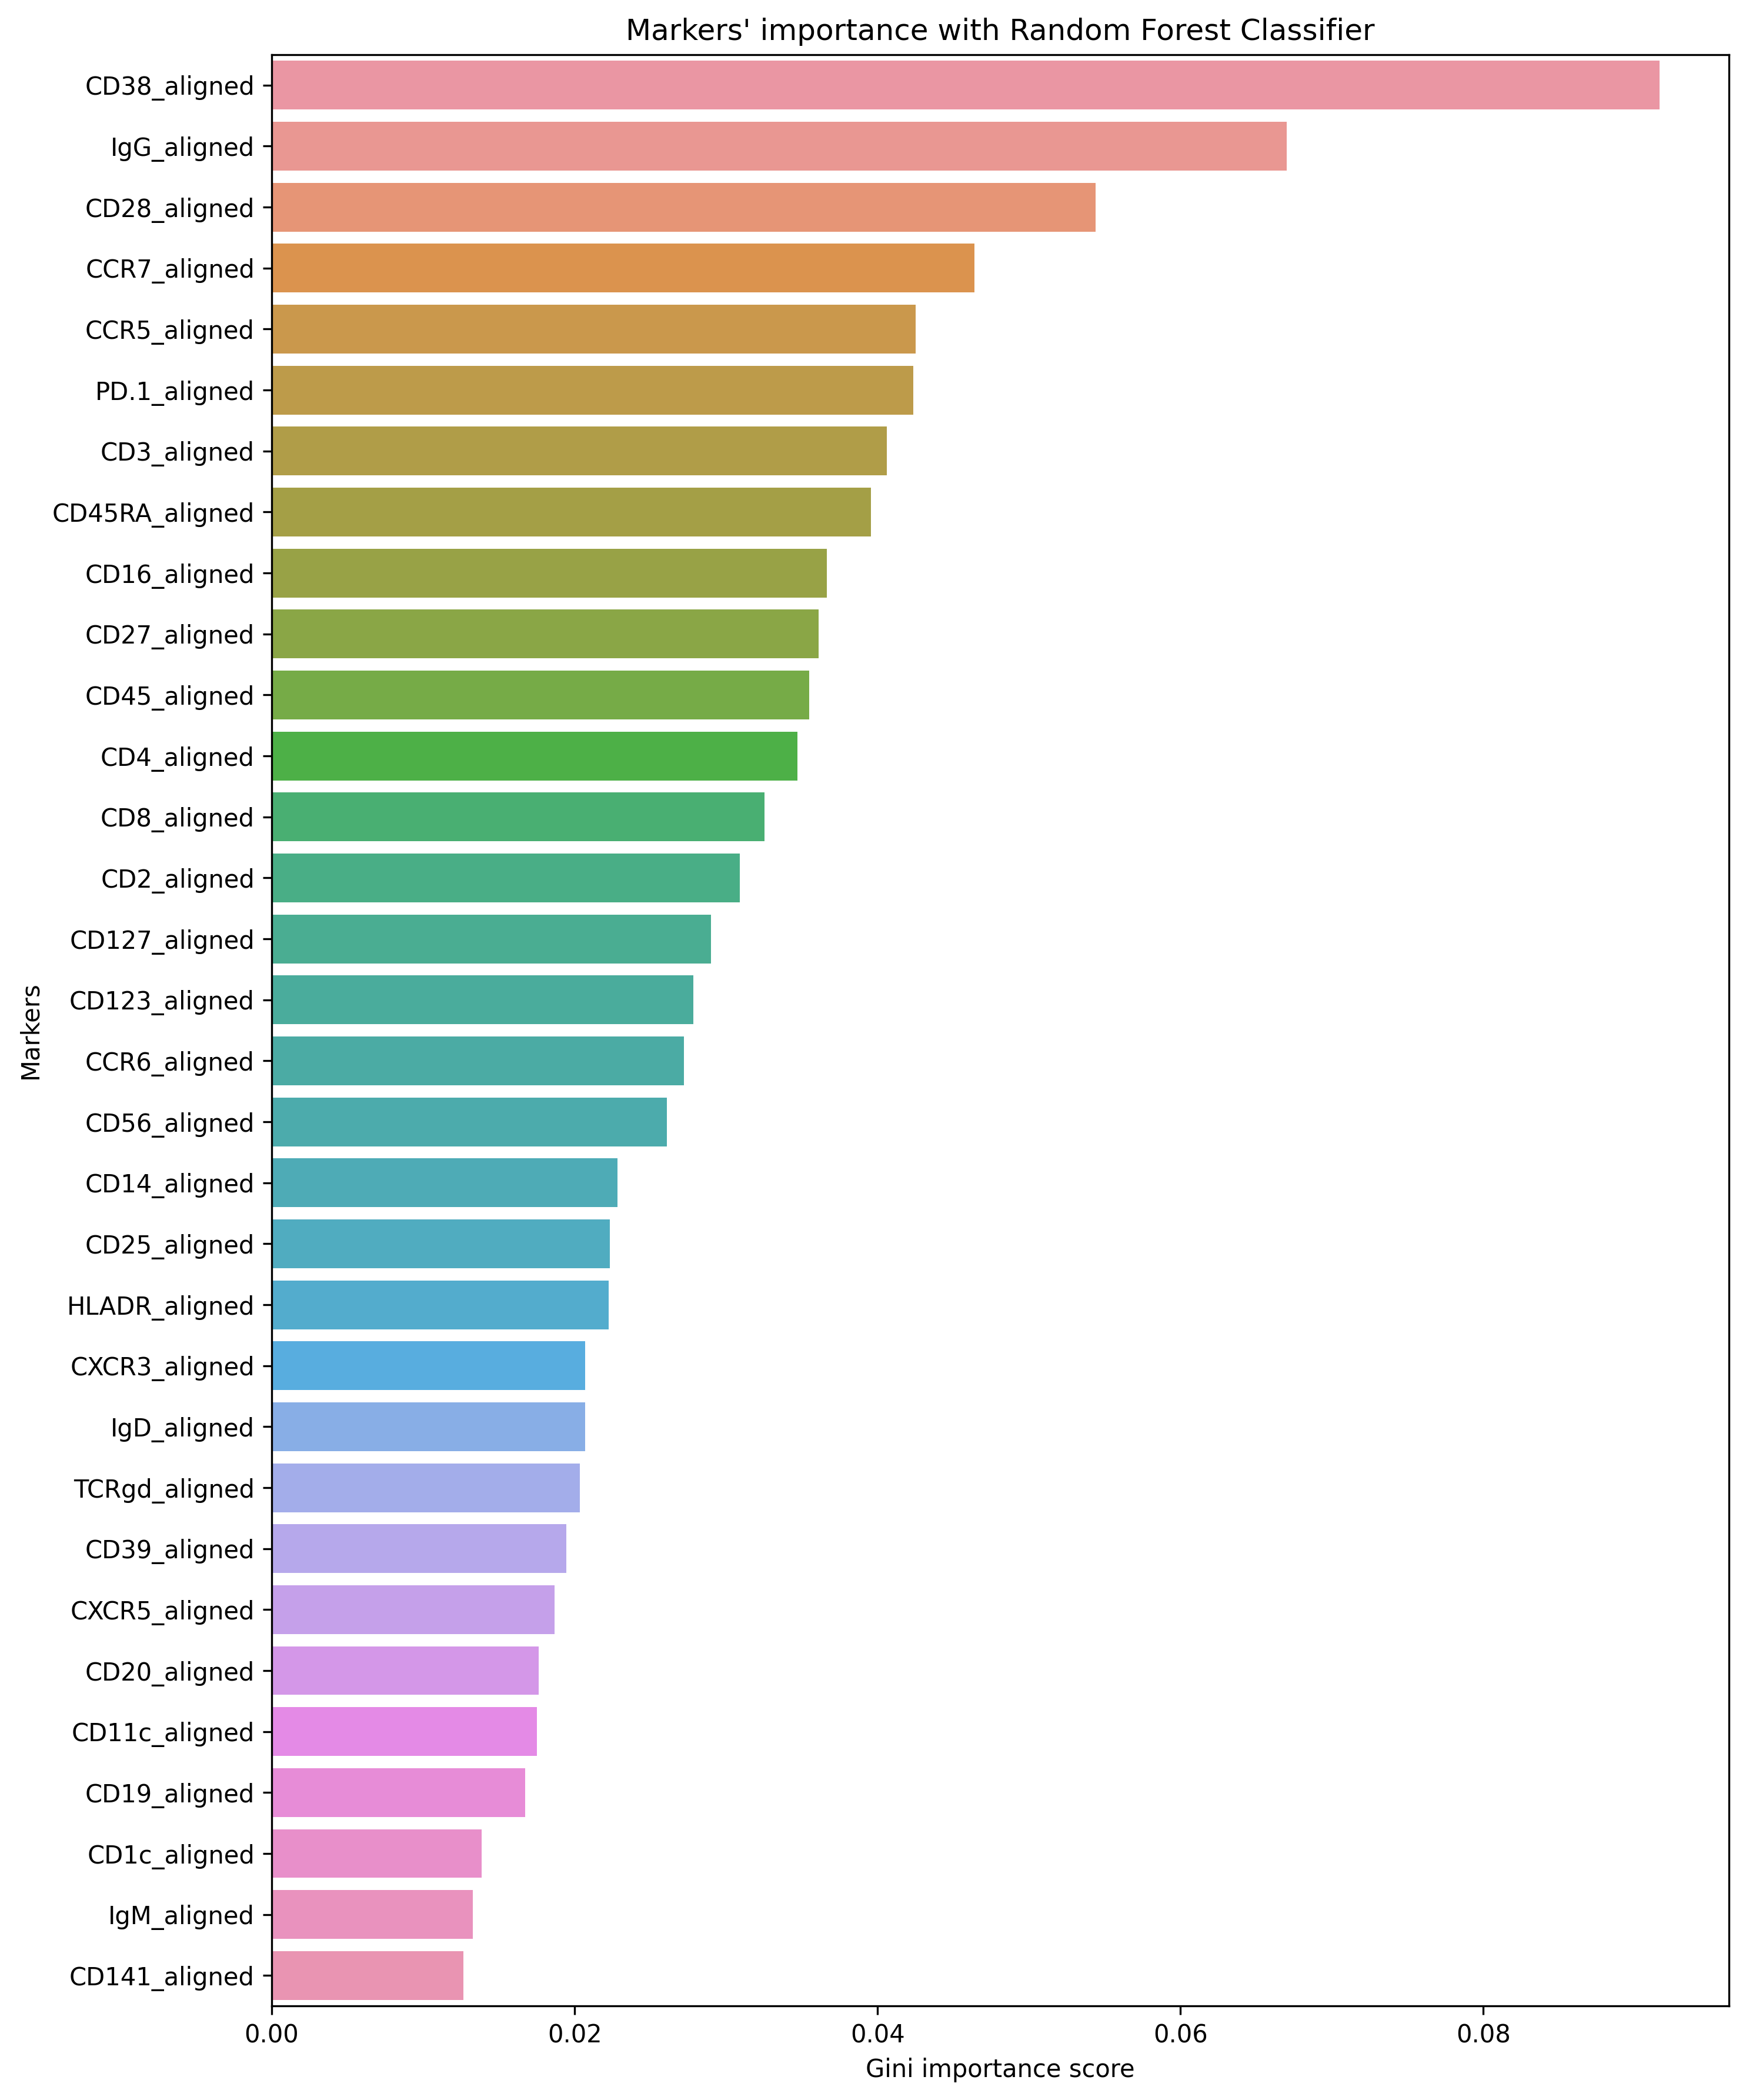

In [32]:
#Plot the barplot of importance features based on the gini importance.
f, ax = plt.subplots(figsize=(10 ,12) , dpi = 300 )
ax = sns.barplot(x=rfc_feature_scores_all, y=rfc_feature_scores_all.index)
ax.set_yticklabels(rfc_feature_scores_all.index)
ax.set_xlabel("Gini importance score")
ax.set_ylabel("Markers")
ax.set_title("Markers' importance with Random Forest Classifier")
plt.tight_layout()
f.savefig('importance Random Forest.png')

Gradient Boosting Classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [28]:
predictions = gb.predict(X_test)

In [29]:
print(confusion_matrix(y_test , predictions))
print('\n')
print(classification_report(y_test , predictions))

[[30053  6432]
 [ 4495 30501]]


              precision    recall  f1-score   support

           0       0.87      0.82      0.85     36485
           1       0.83      0.87      0.85     34996

    accuracy                           0.85     71481
   macro avg       0.85      0.85      0.85     71481
weighted avg       0.85      0.85      0.85     71481



In [30]:
gb_feature_scores = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [31]:
gb_feature_scores_all = gb_feature_scores.loc[gb_feature_scores.index]

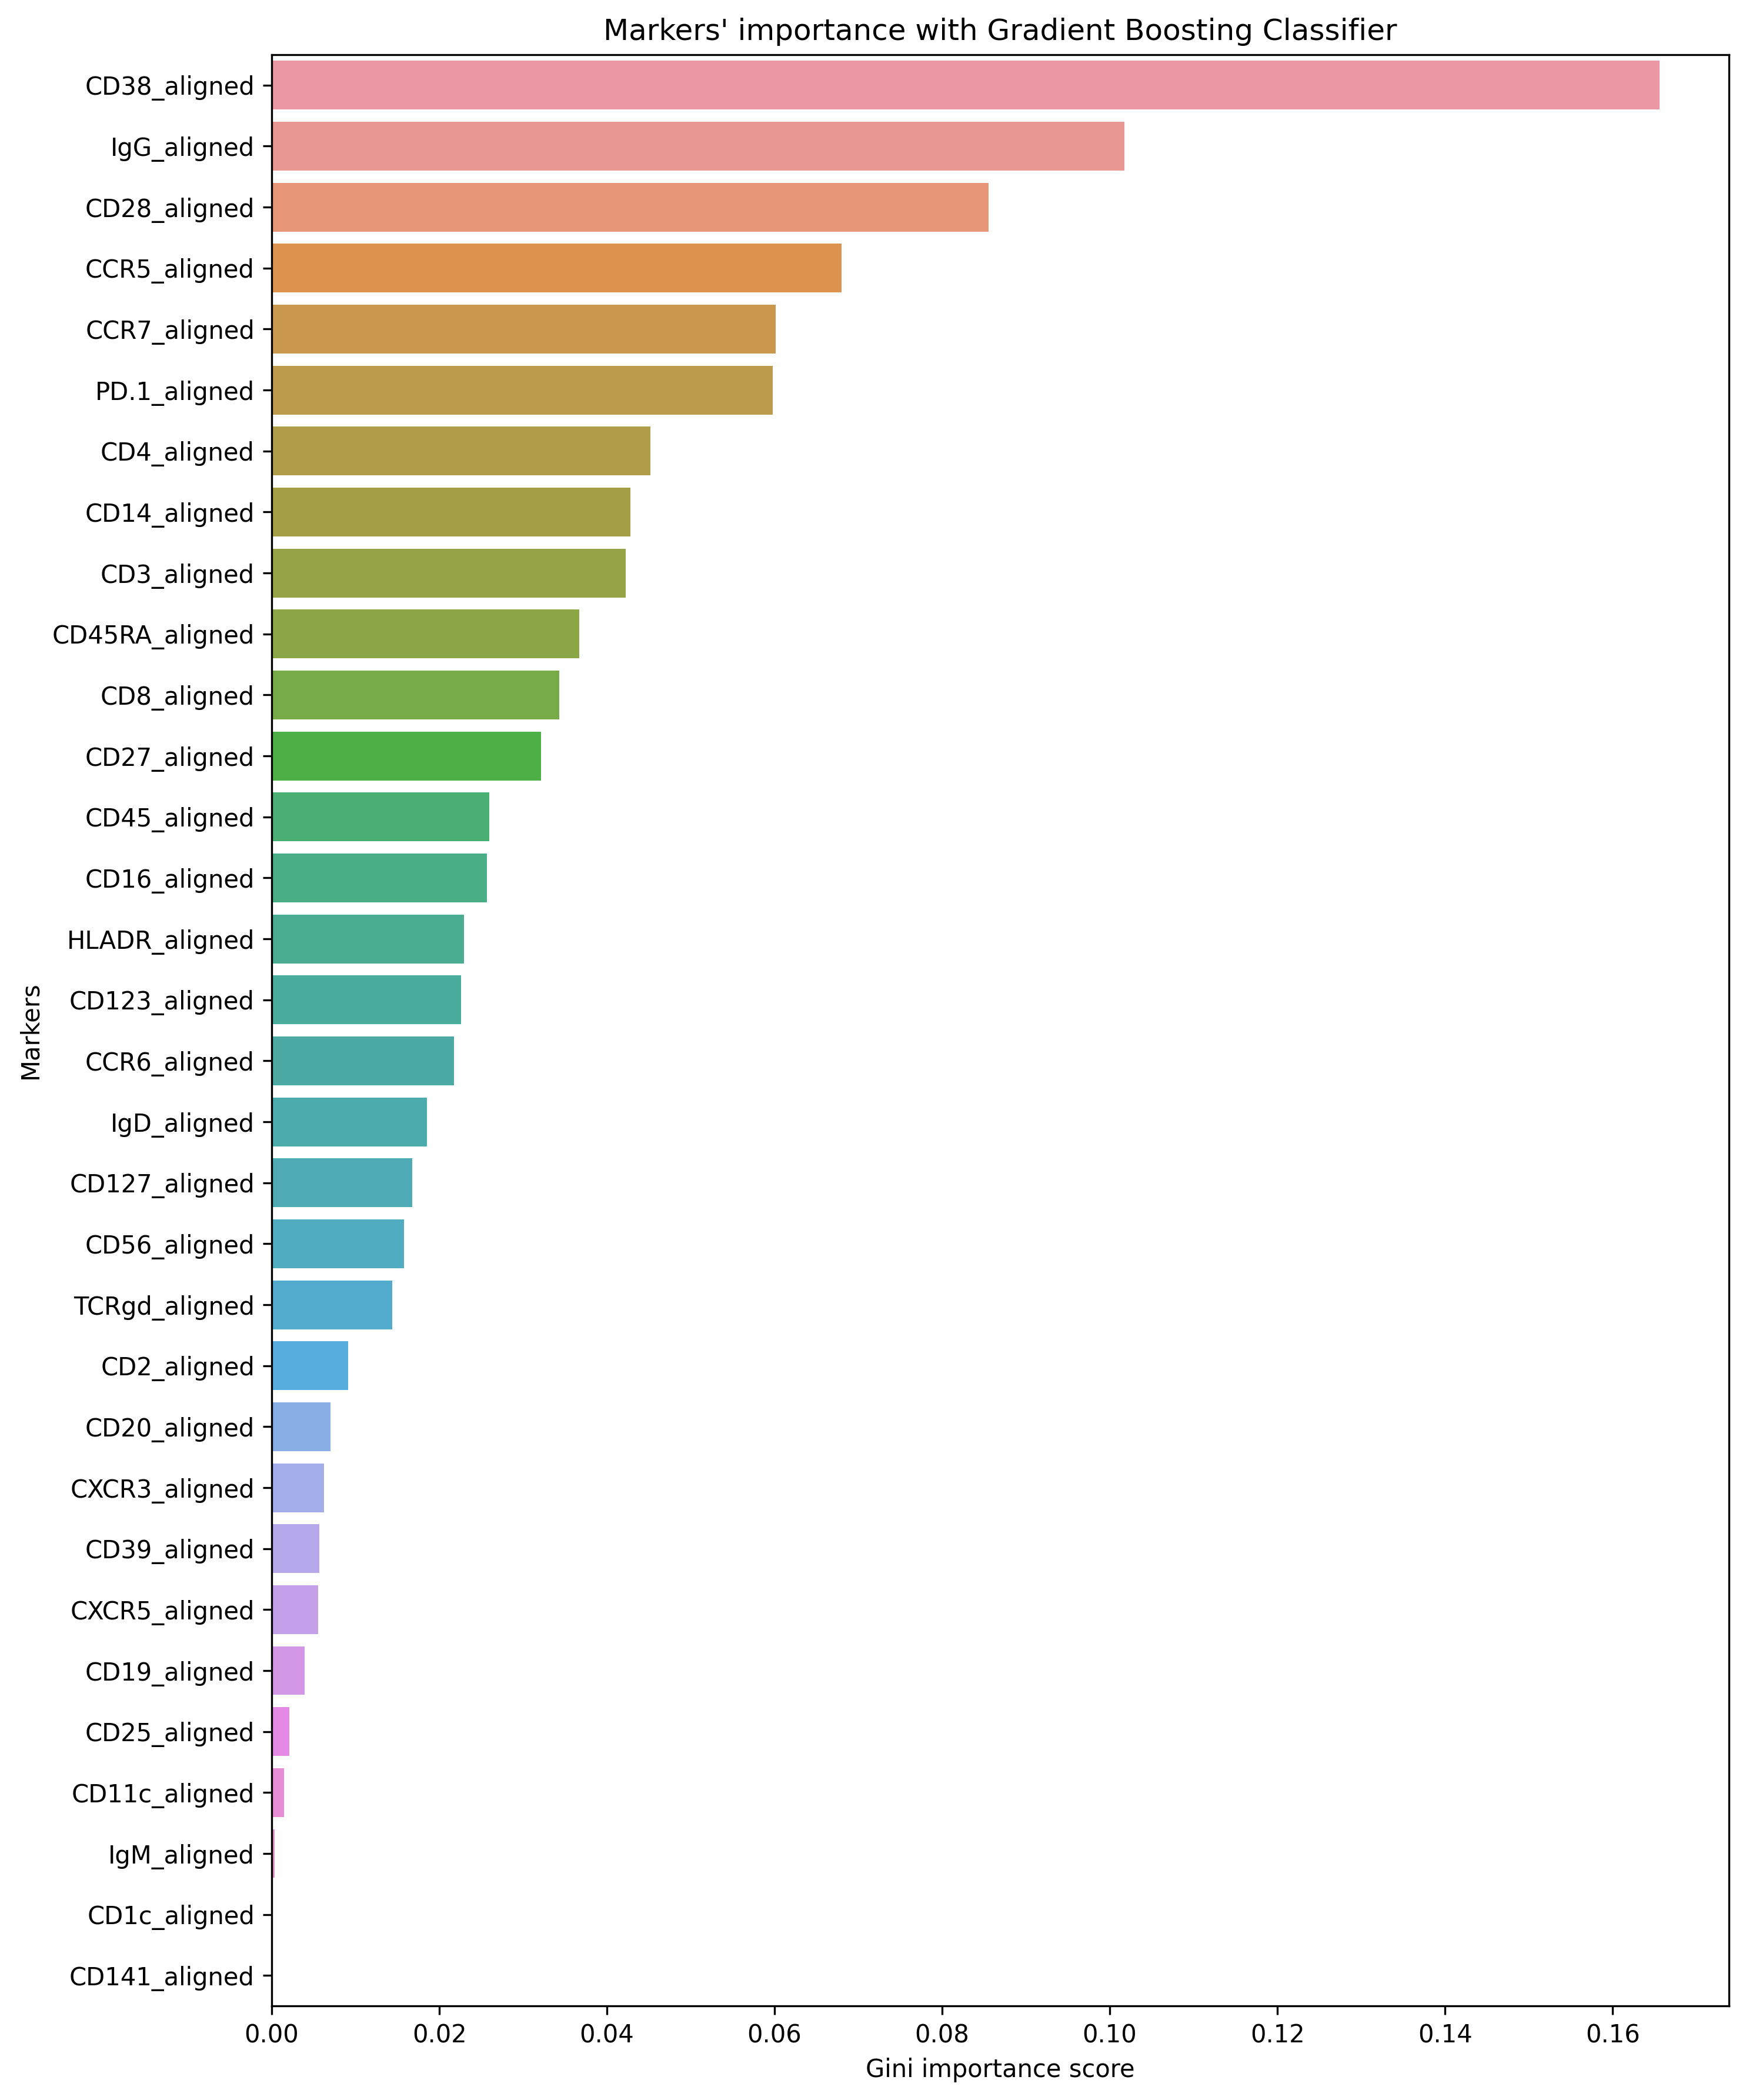

In [33]:
f, ax = plt.subplots(figsize=(10 ,12) , dpi = 300 )
ax = sns.barplot(x=gb_feature_scores_all, y=gb_feature_scores_all.index)
ax.set_yticklabels(gb_feature_scores_all.index)
ax.set_xlabel("Gini importance score")
ax.set_ylabel("Markers")
ax.set_title("Markers' importance with Gradient Boosting Classifier")
plt.tight_layout()
f.savefig('importance Gradient Boosting.png')

Bayesian Additive Regression Tree (BART)

In [34]:
features = pd.read_csv('C:/Users/melod/Desktop/RongRong/Dry/Classifier/Chenhsuan/flow_data/FEATURES.csv' , index_col = 0)

In [35]:
features.head()

,importance,feature
CD38_aligned,0.058545,CD38_aligned
CCR7_aligned,0.051299,CCR7_aligned
PD.1_aligned,0.049644,PD.1_aligned
IgG_aligned,0.049578,IgG_aligned
CD27_aligned,0.045898,CD27_aligned


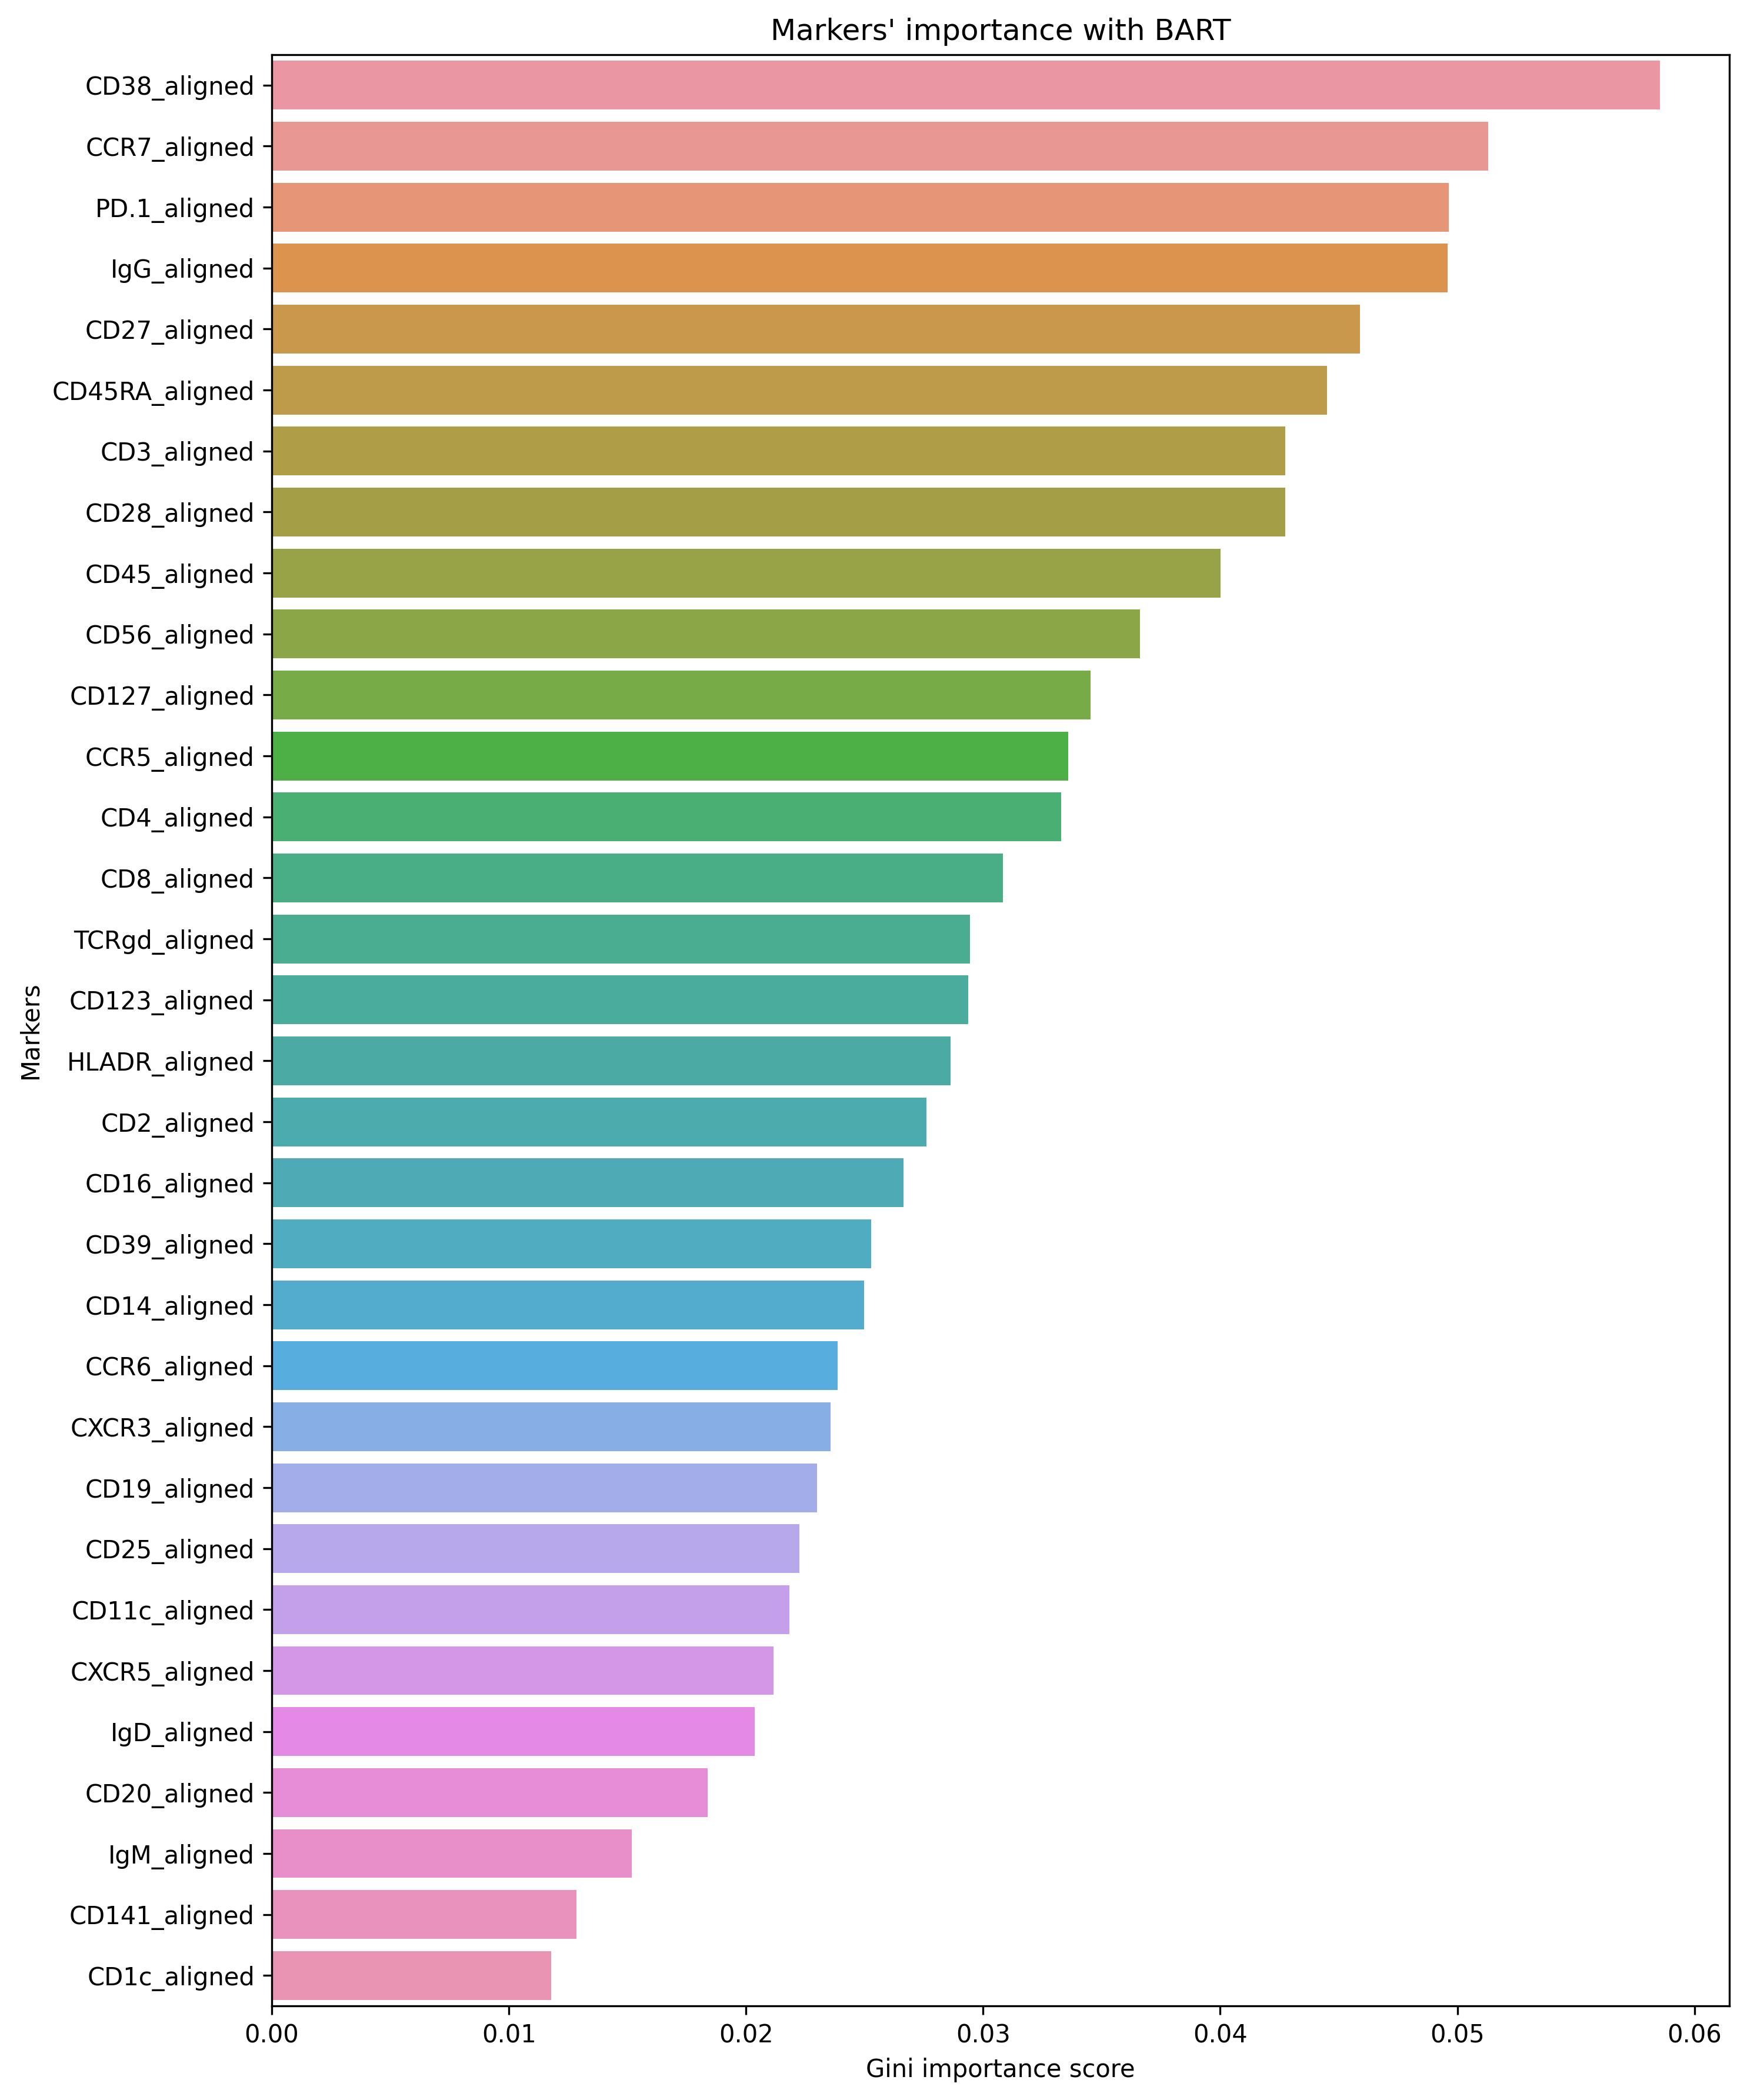

In [36]:
f, ax = plt.subplots(figsize=(10 ,12) , dpi = 300 )
ax = sns.barplot(x= "importance", y="feature" , data= features)
ax.set_yticklabels(features.index)
ax.set_xlabel("Gini importance score")
ax.set_ylabel("Markers")
ax.set_title("Markers' importance with BART")
plt.tight_layout()
f.savefig('importance with BART.png')


SVM

In [7]:
from sklearn.svm import SVC

In [8]:
model = SVC()

In [9]:
model.fit(X_train , y_train)

SVC()

In [37]:
print(model.kernel)

rbf


In [10]:
SVC_prdeict = model.predict(X_test)

In [38]:
print(confusion_matrix(y_test , SVC_prdeict))
print('\n')
print(classification_report(y_test , SVC_prdeict))

[[33858  2627]
 [ 2437 32559]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93     36485
           1       0.93      0.93      0.93     34996

    accuracy                           0.93     71481
   macro avg       0.93      0.93      0.93     71481
weighted avg       0.93      0.93      0.93     71481



ROC

In [11]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [39]:
Y_test = pd.read_csv('C:/Users/melod/Desktop/RongRong/Dry/Classifier/Chenhsuan/flow_data/Y_test.csv' , index_col = 0)
predictions = pd.read_csv('C:/Users/melod/Desktop/RongRong/Dry/Classifier/Chenhsuan/flow_data/predictions.csv' , index_col = 0 )

In [40]:
Y = Y_test.values
Pred = predictions.values

In [41]:
y_score_rfc = rfc.predict_proba(X_test)[:, 1]
y_score_gb = gb.predict_proba(X_test)[:, 1]

In [13]:
y_score_svc = model.decision_function(X_test)

In [42]:
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_score_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_bart, tpr_bart, _ = roc_curve(Y, Pred)
roc_auc_bart = auc(fpr_bart, tpr_bart)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

In [43]:
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

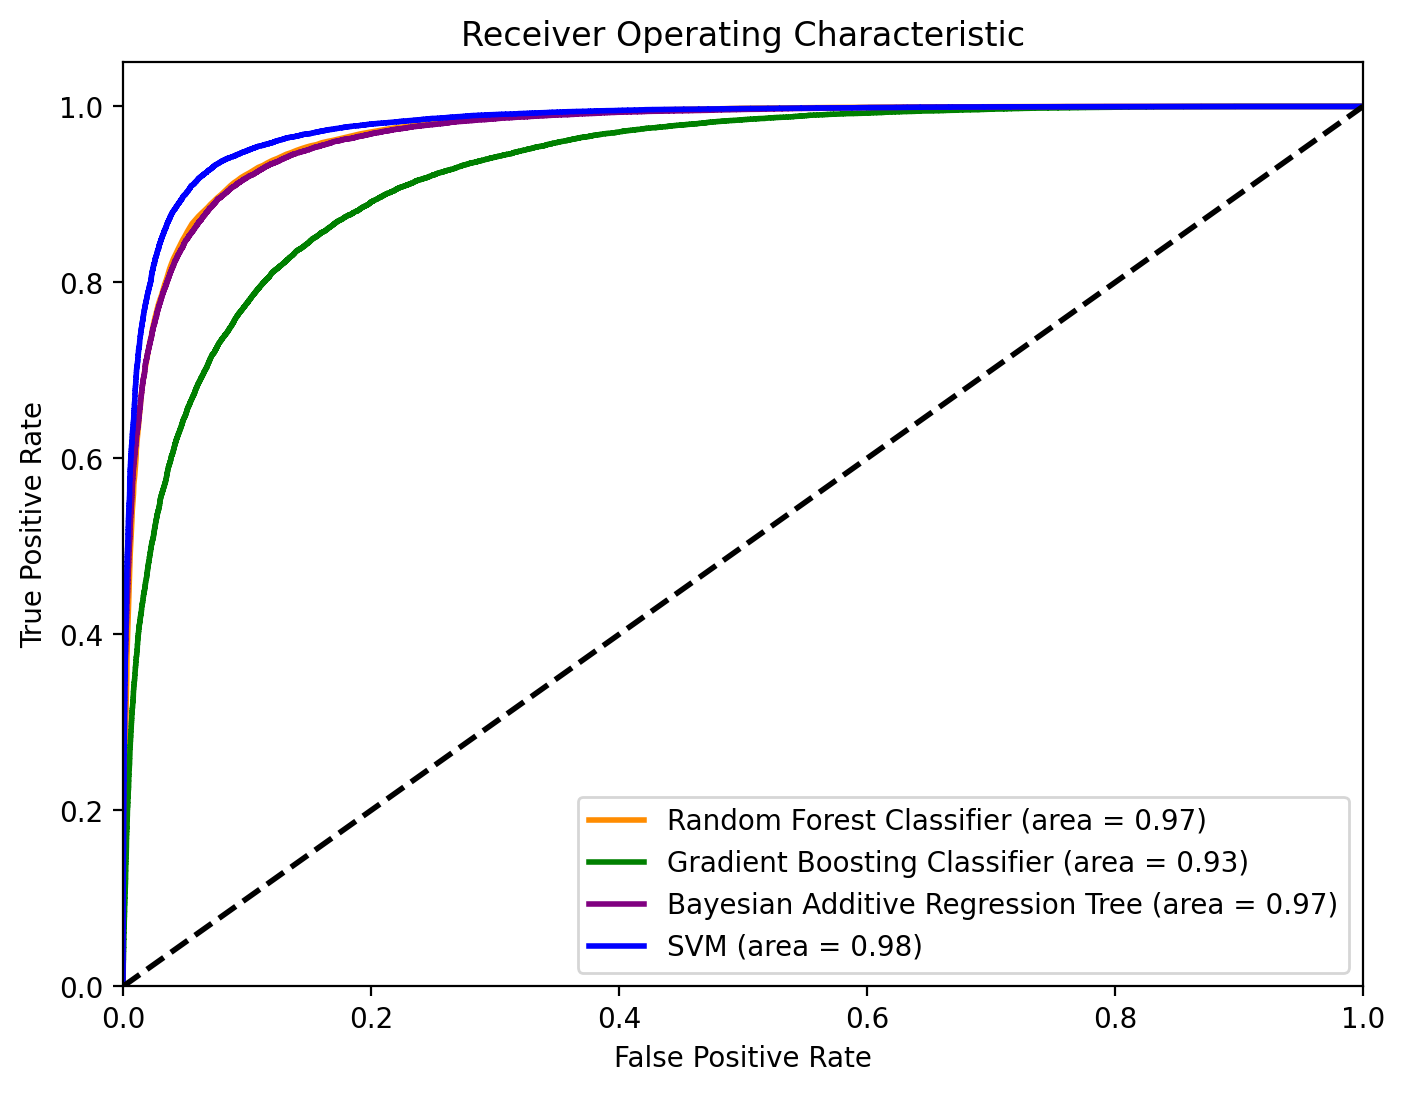

In [45]:
plt.figure(figsize=(8, 6) , dpi = 200)
lw = 2  # 线宽
plt.plot(fpr_rfc, tpr_rfc, color='darkorange',
         lw=lw, label='Random Forest Classifier (area = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_gb, tpr_gb, color='green',
         lw=lw, label='Gradient Boosting Classifier (area = %0.2f)' % roc_auc_gb)
plt.plot(fpr_bart, tpr_bart, color='purple',
         lw=lw, label='Bayesian Additive Regression Tree (area = %0.2f)' % roc_auc_bart)
plt.plot(fpr_svc, tpr_svc, color='blue',
         lw=lw, label='SVM (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('roc_curve.png')
plt.show()
